In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

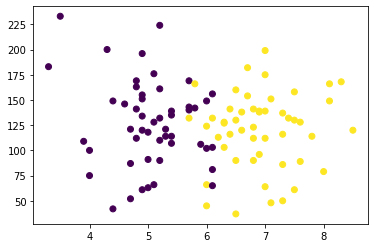

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
Y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
Y_test

34    0
82    1
3     1
73    0
7     0
74    1
86    0
59    0
24    0
37    1
Name: placement, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-1.78184779, -0.63190756],
       [ 0.8746895 ,  1.88386384],
       [ 1.40599696, -0.91143772],
       [-0.71923287, -0.37778924],
       [-0.9848866 ,  1.80762834],
       [-0.01082293, -0.02202359],
       [ 1.31744571,  0.84197871],
       [ 1.84875317,  1.04527337],
       [ 0.8746895 , -1.54673353],
       [ 2.02585566,  1.09609704],
       [ 0.78613826,  0.3591539 ],
       [ 0.8746895 ,  1.27397986],
       [-0.01082293, -2.02955834],
       [-0.9848866 ,  0.76574321],
       [-1.78184779, -1.26720337],
       [ 1.14034323,  0.30833023],
       [ 0.69758701, -0.88602589],
       [-0.80778412,  1.29939169],
       [ 0.07772831,  0.79115505],
       [ 1.31744571,  0.13044741],
       [ 0.07772831, -0.55567207],
       [-0.09937417, -0.47943657],
       [-0.27647666,  0.38456573],
       [-0.27647666,  0.18127107],
       [ 0.2548308 , -0.55567207],
       [ 0.78613826, -0.73355489],
       [-0.89633536, -0.86061406],
       [-0.01082293,  0.61327222],
       [-1.87039903,

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[-1.07343784,  0.96903787],
       [ 0.43193328, -2.232853  ],
       [ 1.22889447,  0.18127107],
       [-0.9848866 , -1.62296903],
       [-0.89633536, -1.57214536],
       [ 0.60903577,  0.74033138],
       [-0.80778412,  0.07962374],
       [-1.07343784, -0.32696558],
       [-1.16198909, -0.09825909],
       [ 1.84875317,  0.61327222]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
Y_test

34    0
82    1
3     1
73    0
7     0
74    1
86    0
59    0
24    0
37    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


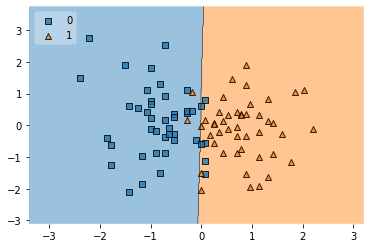

In [ ]:
plot_decision_regions(X_train, Y_train.values,clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))